In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


On the Drive we have a checkout of nannotrax, with metadata in `data` and thumbnails in `images`


In [0]:
home = '/content/drive/My Drive/Coccoliths/nannotrax'
import os
os.chdir(home)

Fix the dependencies; upgrade Pillow before installing pytorch and torchvision

In [0]:
!pip uninstall -y pillow
!pip install pillow

# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl


This next step lays out the images in labelled subfolders in `train` / `validate` and is slow on the Drive. Only needs run once.

In [0]:
# from prepare_image_model import prepare_imagefolder
# prepare_imagefolder()

Using the defaults we end up with 27 labels (but some are descriptive of shapes rather than taxonomic class)

In [0]:
len(os.listdir('train'))

27

This workaround for a call to a missing interface in PIL from pytorch in colab shouldn't be necessary, but seems common. :/

In [0]:
from PIL import Image 
def register_extension(id, extension): 
  Image.EXTENSION[extension.lower()] = id.upper() 
Image.register_extension = register_extension 

def register_extensions(id, extensions):    
  for extension in extensions: register_extension(id, extension) 

Image.register_extensions = register_extensions

Finally train the classifier, saving the state from the run with best validation accuracy into `model`

In [0]:
from train_classifier import train_model, build_model, prepare_data

In [0]:
i, d = prepare_data()
build_model(i, d)


INFO:root:training model with 27 classes


Epoch 0/15
----------
train Loss: 2.0275 Acc: 0.4282
validate Loss: 3.5321 Acc: 0.3005
Epoch 1/15
----------
train Loss: 1.4526 Acc: 0.5597
validate Loss: 1.9204 Acc: 0.4012
Epoch 2/15
----------
train Loss: 1.1008 Acc: 0.6648
validate Loss: 1.5961 Acc: 0.5578
Epoch 3/15
----------
train Loss: 0.8251 Acc: 0.7579
validate Loss: 1.1593 Acc: 0.6704
Epoch 4/15
----------
train Loss: 0.5730 Acc: 0.8228
validate Loss: 1.0297 Acc: 0.7218
Epoch 5/15
----------
train Loss: 0.4555 Acc: 0.8634
validate Loss: 2.5012 Acc: 0.4981
Epoch 6/15
----------
train Loss: 0.3059 Acc: 0.9049
validate Loss: 0.8232 Acc: 0.7987
Epoch 7/15
----------
train Loss: 0.0875 Acc: 0.9761
validate Loss: 0.6378 Acc: 0.8456
Epoch 8/15
----------
train Loss: 0.0350 Acc: 0.9934
validate Loss: 0.6500 Acc: 0.8509
Epoch 9/15
----------
train Loss: 0.0249 Acc: 0.9919
validate Loss: 0.6886 Acc: 0.8538
Epoch 10/15
----------
train Loss: 0.0211 Acc: 0.9965
validate Loss: 0.7203 Acc: 0.8523
Epoch 11/15
----------
train Loss: 0.0114 

Sample the model's results on the validation set. Looking all right at 85% accuracy.

0


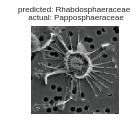

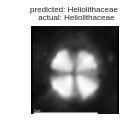

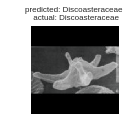

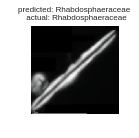

4


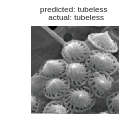

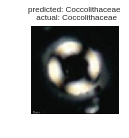

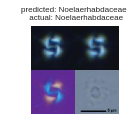

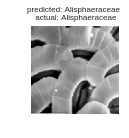

8


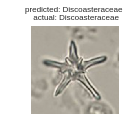

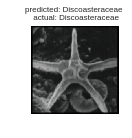

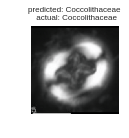

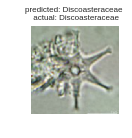

12


In [0]:
import matplotlib

from visualise_results import visualise_model, load_model
visualise_model(load_model('model'))